In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
#import springmassdamper as smd
import copy
import time
import torch
#import animation_test
from scipy import signal
from datasets import *
import pdb

torch.set_default_dtype(torch.float32)



BS=2048    # Batch size for training

## Run new simulations ##
# d1, sim_length, _, _=smd.run_multimass_sim(run_nums=30,out_data=3,num_repeats=1)  # run simulation of 3 masses and a pendulum
#d1, sim_length, _, _=smd.run_singlemass_sim(run_nums=30,out_data=3,num_repeats=1)   # run simulation of single mass system

## Load previously generated simulation data ##
# d1=torch.load('data_3.pt')

datasets = {'springmass': spring_mass}
propor=0.75
dataset = datasets['springmass']('/Users/avi/Desktop/Food_GVAE-master/E2C_spring_mass/data/' )
train_set, test_set = dataset[:int(len(dataset) * propor)], dataset[int(len(dataset) * propor):]
train = torch.utils.data.DataLoader(train_set, batch_size=2048, shuffle=True, drop_last=False)
test= torch.utils.data.DataLoader(test_set, batch_size=2048, shuffle=True, drop_last=False)

In [2]:
first_batch = next(iter(test))

In [3]:
x=first_batch[0]
u=first_batch[1]
x_next=first_batch[2]

In [4]:
import torch
from models import E2C

# Load the trained model
model = E2C(2,2,1)
model.load_state_dict(torch.load('/Users/avi/Desktop/Food_GVAE-master/E2C_spring_mass/result/springmass/Users/avi/Desktop/Food_GVAE-master/E2C_spring_mass/logs/model_500'))


model.eval()

E2C(
  (encoder): springEncoder(
    (net): Sequential(
      (0): Linear(in_features=2, out_features=150, bias=True)
      (1): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Linear(in_features=150, out_features=150, bias=True)
      (4): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): Linear(in_features=150, out_features=150, bias=True)
      (7): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU()
      (9): Linear(in_features=150, out_features=4, bias=True)
    )
  )
  (decoder): springDecoder(
    (net): Sequential(
      (0): Linear(in_features=2, out_features=200, bias=True)
      (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Linear(in_features=200, out_features=200, bias=True)
      (4): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True,

In [5]:


device='cpu'
x = x.view(-1, model.obs_dim).double().to(device)
u = u.double().to(device)
x_next = x_next.view(-1, model.obs_dim).double().to(device)
x_recon, x_next_pred, q_z, q_z_next_pred, q_z_next,z = model.forward(x, u, x_next)



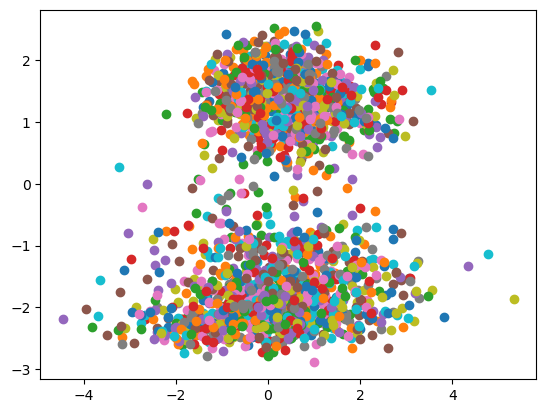

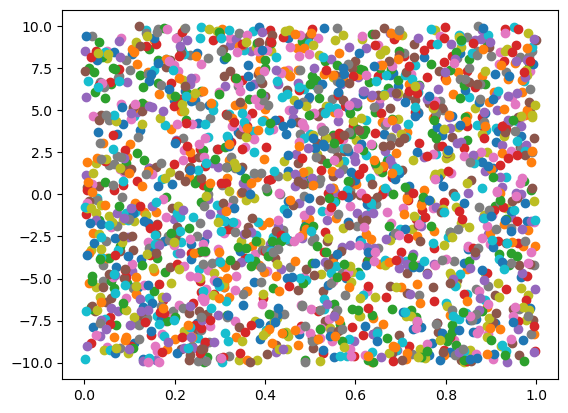

In [6]:
x=x.detach().numpy()
z=z.detach().numpy()
sim_length=1
for i in range(0,len(x),sim_length):
    plt.scatter(z[i:i+sim_length,0],z[i:i+sim_length,1])
plt.show()

## Plot the state space phase portrait ##
for i in range(0,len(x),sim_length):
    plt.scatter(x[i:i+sim_length,0],x[i:i+sim_length,1])
plt.show()

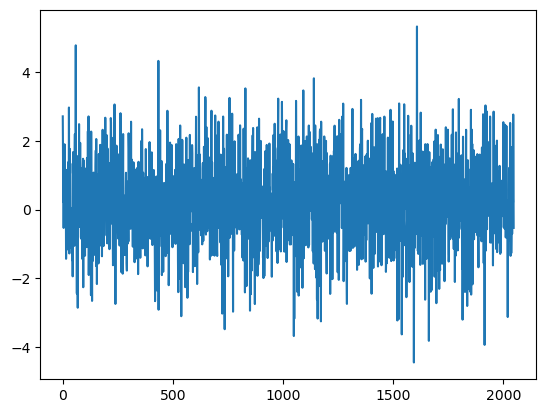

In [9]:

plt.plot(range(len(z)),z[:,0])
